# Gradient Descent com Tensorflow

Author: H3dema

In [67]:
import tensorflow as tf
import numpy as np

%matplotlib inline  
import matplotlib.pyplot as plt

## Gera dados aleatoriamente

In [68]:
# gera uma conjunto de dados (aprox. reta) aleatoriamente
n = 1500  # number of points
bias = 50
variance = 1000
max_x = 1000

x_values = np.sort(max_x *np.random.rand(n))
y_values = bias * (np.random.rand(n) - 0.5) + variance * (np.random.rand(n) - 0.5) + x_values

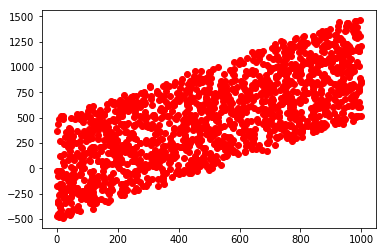

In [69]:
# scatter plot

plt.plot(x_values, y_values, 'ro')
plt.show()

## Criação de variáveis para gradient descent no Tensorflow

In [70]:
# parametros da regressão
w = tf.Variable(0, name='weights', dtype='float')
b = tf.Variable(0, name='bias', dtype='float')

# placeholders
X = tf.placeholder("float")
Y = tf.placeholder("float")

# equação -- Y_Pred = w * X + b
Y_pred = tf.add(tf.multiply(w, X), b)

In [71]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))/(2*n)

In [72]:
learning_rate = 0.01
training_epochs =  50

# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [73]:
# Initializa as variáveis (i.e. coloca os valores default) --- obrigatório
init = tf.global_variables_initializer()

In [74]:
# Inicia a sessão de treino
sess = tf.Session()
sess.run(init)

## Treinamento

In [75]:
c = 0

log = []  # guarda os custos durante as iteracoes

for epoch in range(training_epochs):
    for (x, y) in zip(x_values, y_values):
        _, c = sess.run([optimizer, cost], feed_dict={X: x, Y: y})
        # print("Iteracao: %d   Custo: %7.3f" % (epoch, c))
    log.append([epoch, c])

In [76]:
print("Optimização terminou -- %d passos" % training_epochs)
training_cost = sess.run(cost, feed_dict={X: x_values, Y: y_values})
print("Custo   = %7.3f" % training_cost)
print("Weights = %7.3f" % sess.run(w))
print("Bias    = %7.3f" % sess.run(b))

Optimização terminou -- 50 passos
Custo   =     nan
Weights =     nan
Bias    =     nan


[]

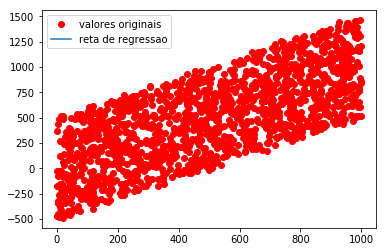

In [77]:
# Gráfico do ajuste
plt.plot(x_values, y_values, 'ro', label='valores originais')  # dispersão
plt.plot(x_values, sess.run(w) * x_values + sess.run(b), label='reta de regressao')

plt.legend(loc=2)  # loc=2 é "upper left"
plt.plot()

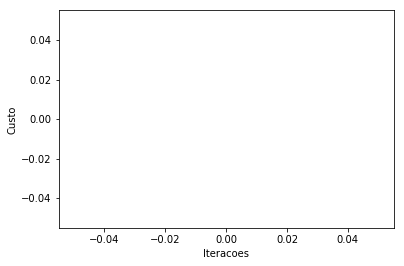

In [78]:
log = np.array(log)

x = log[:,0]  # numero da iteracao
y = log[:,1]  # valor do custo

plt.plot(x,y)
plt.xlabel('Iteracoes')
plt.ylabel('Custo')
plt.show()